# Data Incubator Project Proposal:

#### Lucas Kelly
#### Repo: https://github.com/lucaskelly49/Data-Incubator-Project-Proposal
#### Data source 1: http://datasets.wri.org/dataset/globalpowerplantdatabase
#### Data source 2: https://www.eia.gov/environment/emissions/state/


## STEP 1: Identify top power plants ready to adopt CCS based on a scoring system. (Web scraping, API utilization, Naive Bayes Classification)
#### * 1.1 Install and import necessary libraries
#### * 1.2a Clean and explore data (Data source 1)
#### * 1.2b Clean and explore data (Data source 2)
#### * 1.3 Utilize Geocoding to convert lat/long columns to state column
#### * 1.4 Exploratory Data Analysis (EDA)
#### * 1.5 Create scoring system for Bayes Classification System

### 1.1 Install and import necessary libraries

In [92]:
# Geopy need for lat/long to state conversions
!pip install geopy

In [104]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pygeocoder import Geocoder

In [94]:
# Import database
df = pd.read_csv('global_power_plant_database.csv')

### 1.2a Clean and explore data (Data source 1)

In [95]:
# Exploring database
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(28664, 22)

In [5]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,28664.000000,28664.000000,2.866400e+04,14952.000000,16145.000000,439.000000,455.000000,958.000000,8326.000000,27536.000000
mean,186.097600,68.817502,9.925621e+01,1994.698521,2016.035367,2339.270238,2622.049124,1859.660249,532.668481,807.796919
std,523.027253,3610.172087,1.092781e+04,23.406231,1.258145,4384.011370,4138.194312,3965.618811,1935.490760,2687.873796
min,1.000000,-77.847000,-1.799777e+02,1896.000000,2000.000000,0.000000,0.000000,0.000000,-768.620000,0.000000
25%,4.795850,28.010225,-7.905748e+01,1985.000000,2016.000000,226.735625,253.466300,57.898941,3.197500,8.099628
50%,18.640000,39.950000,-3.928400e+00,2004.000000,2016.000000,731.334950,1015.676100,468.989500,20.354000,44.796959
75%,99.200000,46.980275,2.100702e+01,2012.000000,2016.000000,2636.217675,3170.871000,2152.211500,176.508999,293.907237
max,22500.000000,415750.000000,1.075744e+06,2018.000000,2018.000000,50834.000000,28127.000000,59546.865000,32377.477000,92268.763466


In [6]:
country_list = df['country_long'].unique().tolist()
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Cote DIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [96]:
# Creating second database with only US power plants
df_US = df.loc[df['country_long']== 'United States of America']

In [8]:
df_US.shape

(8119, 22)

In [86]:
df_US = df_US.reset_index()

In [10]:
df_US.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,8119.000000,8119.000000,8119.000000,8098.000000,8077.0,0.0,0.0,0.0,7973.000000,8063.000000
mean,145.812976,38.994890,-94.972758,1992.897367,2016.0,NaN,NaN,NaN,510.020138,538.163215
std,381.046037,5.813876,20.194631,25.009828,0.0,NaN,NaN,NaN,1884.701080,1968.708249
min,1.000000,13.303500,-171.712400,1896.000000,2016.0,NaN,NaN,NaN,-768.620000,0.000000
25%,3.200000,35.170750,-112.620550,1982.892060,2016.0,NaN,NaN,NaN,3.020000,3.746574
50%,12.000000,39.473600,-91.654200,2002.000000,2016.0,NaN,NaN,NaN,17.680000,16.131113
75%,86.500000,42.502200,-79.040200,2012.000000,2016.0,NaN,NaN,NaN,160.261000,163.929747
max,6809.000000,71.292000,144.899900,2017.000000,2016.0,NaN,NaN,NaN,32377.477000,32939.505595


### 1.2b Clean and explore data (Data source 2)

In [133]:
df_state = pd.read_excel('table2.xlsx', 'Sheet1', index_col=None)
df_state.to_csv('table2.csv', encoding='utf-8')

In [134]:
df_state = df_state.drop([0,1,2,3])
df_state.reset_index(drop = True)
df_state.head()

,"Table 2. State energy-related carbon dioxide emissions by year, adjusted (2005─2016)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
4,Alabama,145.717386,148.040103,149.574946,141.803359,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,-0.205848,-29.9956
5,Alaska,49.017593,46.644660,44.870695,40.253261,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,-0.283898,-13.916
6,Arizona,98.289736,101.468835,103.357057,103.841365,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,-0.109929,-10.8049
7,Arkansas,61.080761,62.918003,64.213320,65.141909,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.0273991,1.67356
8,California,390.133567,398.302410,403.127766,387.428138,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,-0.0686703,-26.7906


In [135]:
columns = ['State', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', 'Percent Change', 'Absolute Change']
df_state.columns = columns

In [136]:
df_state = df_state.drop([56, 57, 58, 59])
df_state = df_state.reset_index(drop = True)

In [137]:
df_state.head()

,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percent Change,Absolute Change
0,Alabama,145.717386,148.040103,149.574946,141.803359,121.948916,134.614539,131.646689,125.112394,122.512730,124.751678,121.682353,115.721763,-0.205848,-29.9956
1,Alaska,49.017593,46.644660,44.870695,40.253261,38.588620,39.465576,39.306465,38.829165,36.659247,35.795496,36.696731,35.101593,-0.283898,-13.916
2,Arizona,98.289736,101.468835,103.357057,103.841365,94.836579,96.637581,94.617175,92.780880,96.450602,94.371266,92.111361,87.484845,-0.109929,-10.8049
3,Arkansas,61.080761,62.918003,64.213320,65.141909,62.419653,66.723731,68.145755,67.036206,69.343168,69.892555,60.011481,62.754316,0.0273991,1.67356
4,California,390.133567,398.302410,403.127766,387.428138,373.800883,367.817653,353.224905,358.604029,360.716723,357.499077,365.409907,363.342966,-0.0686703,-26.7906


In [129]:
df_state.describe()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,230.446784,227.403107,230.970302,223.672877,207.524641,215.039031,209.752426,201.640620,206.607337,208.435814,202.850593,199.592222
std,821.915283,811.331844,823.851167,797.647475,740.153529,767.108281,748.583302,719.912896,737.794486,744.198822,724.516580,713.440542
min,3.984124,3.229448,3.425608,3.130070,3.223236,3.256372,3.121709,2.689762,2.864565,3.058483,3.024267,2.779124
25%,47.964697,44.258819,44.749094,42.953964,41.114834,40.827106,38.912932,38.495197,38.974619,38.318031,38.203747,37.846385
50%,86.655498,84.445987,87.286808,88.166380,82.805444,87.067803,83.583234,77.356416,78.038303,79.022829,75.590831,76.412816
75%,153.199220,151.785695,155.202503,151.754250,136.754993,146.544178,139.480047,130.864937,134.419065,134.827477,125.405319,122.063107
max,5991.616393,5912.480786,6005.227855,5815.494797,5395.640671,5591.014797,5453.563076,5242.656132,5371.790758,5419.331170,5274.115412,5189.397770


### 1.3 Utilize Geocoding to convert lat/long columns to state column

#### * Google Maps API
#### * Geocoder

In [98]:
# NOTE: Need to connect to Google Maps API

results = Geocoder.reverse_geocode(df_US['latitude'][0], df_US['longitude'][0])

KeyError: 0

### 1.4 Exploratory Data Analysis (EDA)

In [105]:
# Which types of power plants does the database contain

fuel_list = df['fuel1'].unique().tolist()
fuel_list

['Hydro',
 'Gas',
 'Other',
 'Oil',
 'Wind',
 'Nuclear',
 'Coal',
 'Solar',
 'Waste',
 'Biomass',
 'Wave and Tidal',
 'Geothermal',
 nan,
 'Cogeneration',
 'Storage',
 'Petcoke']

In [106]:
# How is ownership recorded?

owner_list = df_US['owner'].unique().tolist()
owner_list

['SunRay Power LLC',
 '126 Grove Solar LLC',
 'Los Angeles Department of Water & Power',
 'Avidan Energy Solutions',
 'Rochelle Municipal Utilities',
 '158th Fighter Wing',
 '180 Raritan Energy Solutions  LLC',
 'Banyan St./GAP 191 Peachtree Owner  LLC',
 'SE Solarne2 LLC',
 'SH Solarne2 LLC',
 'Pristine Sun LLC',
 'NuGen Capital Management',
 '350 Clark Solar NG  LLC',
 '433 Purchase Solar NG  LLC',
 'EBD Hydro LLC',
 'City of Holland',
 'ESA Four Oaks NC 1  LLC',
 '500 Virginia Solar  LP',
 'New York Power Authority',
 '510 REPP One LLC',
 'Consolidated Edison Co-NY Inc',
 '651 Chase Solar NG LLC',
 '6th St Solar Park of Gainesville FL',
 'AES Wind Generation Inc',
 'Duke Energy Carolinas  LLC',
 'Southern Indiana Gas & Elec Co',
 'Pacific Gas & Electric Co',
 'Connecticut Mun Elec Engy Coop',
 'AES Corporation',
 'Drummond Company  Inc.',
 'ABEC Bidart-Old River LLC',
 'Sustainable Power Group  LLC',
 'AC Landfill Energy LLC',
 'Marina Energy LLC',
 'ADA Carbon Solutions (Red River)

In [108]:
# CCS shows great prospect among natural gas plants. How many natural gas plants are in the US data?

df_US_gas = df_US.loc[df['fuel1']== 'Gas']

In [109]:
df_US_gas.shape

(1097, 22)

In [110]:
df_US_gas.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'fuel1', 'fuel2', 'fuel3', 'fuel4',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016',
       'estimated_generation_gwh'],
      dtype='object')

In [162]:
# How many US coal plants are shown in this database?

df_US_coal = df_US.loc[df['fuel1']== 'Coal']
df_US_coal.shape

(426, 22)

In [113]:
# Show the top 5 predicted producing natural gas plants

df_US_gas_sorted = df_US_gas.sort_values(by=['estimated_generation_gwh'], ascending = False)
df_US_gas_sorted = df_US_gas_sorted.reset_index()

In [114]:
x = df_US_gas_sorted.loc[1:6,'name'].tolist()
y = df_US_gas_sorted.loc[1:6, 'estimated_generation_gwh'].tolist()

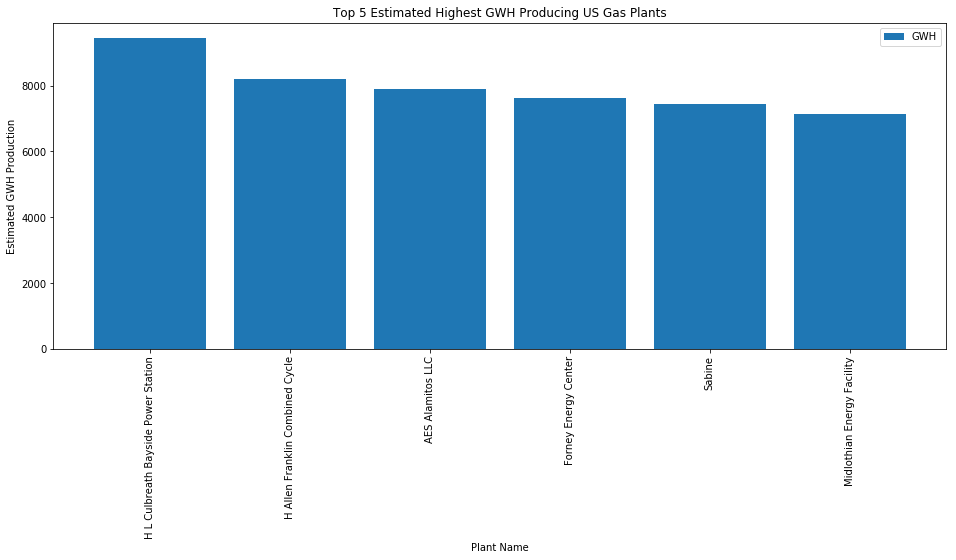

In [115]:
plt.figure(figsize=(16,6))

# Use bar() function to create a plot using above values on both x and y co-ordinates. Add a label.
plt.bar(x, y, label='GWH')

plt.xlabel('Plant Name')
plt.ylabel('Estimated GWH Production')
plt.xticks(rotation='vertical')

plt.title('Top 5 Estimated Highest GWH Producing US Gas Plants')
plt.legend()

# Output the final plot
plt.show()

In [116]:
# According to a report published by the Global CCS Institute, the coal 
# seam at Powder River Basin is the countries top prospect in carbon capture 
# storage. It's general coordinates are around 106W and 44N. 

# The below graph shows the top 5 nearest natural gas plants to that location.


In [117]:
df_US_lat_long1 = df_US.loc[df_US['latitude'] > 42]
df_US_lat_long2 = df_US_lat_long1.loc[df_US_lat_long1['latitude'] < 46]
df_US_lat_long3 = df_US_lat_long2.loc[df_US_lat_long2['longitude'] < -100]

df_US_lat_long3

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
20190,USA,United States of America,45 Mile Hydroelectric Project,USA0058455,3.0,44.5281,-121.1528,Hydro,NaN,NaN,...,EBD Hydro LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,7.332000,8.363670
20316,USA,United States of America,Alcova,USA0006409,41.4,42.5484,-106.7175,Hydro,NaN,NaN,...,U S Bureau of Reclamation,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,108.678000,115.418651
20385,USA,United States of America,Amalgamated Sugar LLC Nampa,USA0054690,8.7,43.6058,-116.5753,Gas,NaN,NaN,...,Amalgamated Sugar Co-Nampa,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,53.793000,35.802357
20386,USA,United States of America,Amalgamated Sugar Twin Falls,USA0010504,10.2,42.5328,-114.4328,Coal,Gas,NaN,...,The Amalgamated Sugar Co,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,51.971438,53.424963
20412,USA,United States of America,American Falls,USA0000809,92.4,42.7778,-112.8764,Hydro,NaN,NaN,...,Idaho Power Co,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,243.379000,257.601048
20436,USA,United States of America,Anderson Ranch,USA0006395,40.0,43.3571,-115.4515,Hydro,NaN,NaN,...,U S Bureau of Reclamation,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,145.394000,111.515605
20514,USA,United States of America,Arlington Wind Power Project,USA0056855,103.0,45.7167,-120.2008,Wind,NaN,NaN,...,Arlington Wind Power Project LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,201.811000,232.247795
20523,USA,United States of America,Arrowrock Hydroelectric Project,USA0056997,15.0,43.5950,-115.9233,Hydro,NaN,NaN,...,Boise-Kuna Irrigation District,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,66.805000,41.818352
20527,USA,United States of America,Arvada,USA0008028,22.5,44.6900,-106.1092,Gas,NaN,NaN,...,Basin Electric Power Coop,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,0.165000,92.592304
20541,USA,United States of America,Ashton,USA0000825,6.7,44.0786,-111.4973,Hydro,NaN,NaN,...,PacifiCorp,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2016.0,NaN,NaN,NaN,28.779000,18.678864


In [118]:
df_US_lat_long3_sorted = df_US_lat_long3.sort_values(by=['longitude'], ascending = False)
data = df_US_lat_long3_sorted.reset_index()

In [119]:
data = data.iloc[[20, 27, 38]]


In [120]:
x2 = data['name'].tolist()
y2 = data['estimated_generation_gwh'].tolist()

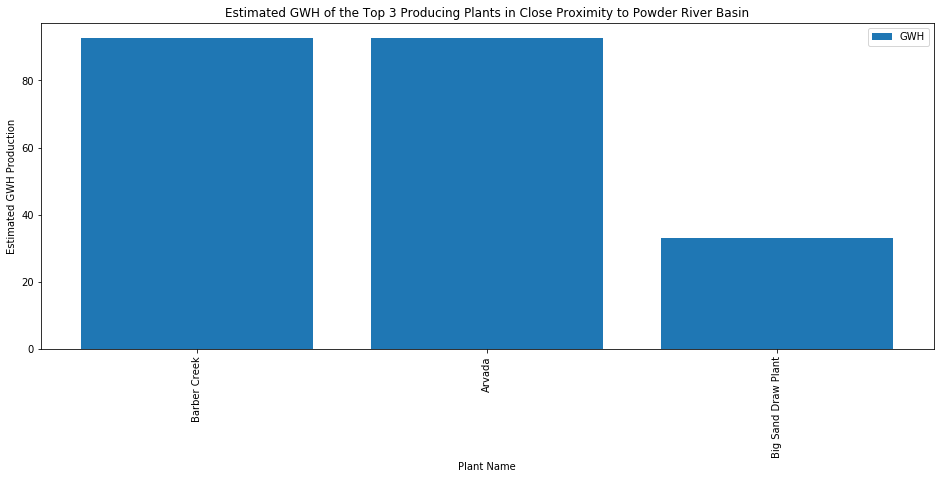

In [123]:
# Create figure
plt.figure(figsize=(16,6))

# Generate bar graph
plt.bar(x2, y2, label='GWH')
plt.xlabel('Plant Name')
plt.ylabel('Estimated GWH Production')
plt.xticks(rotation='vertical')
plt.title('Estimated GWH of the Top 3 Producing Plants in Close Proximity to Powder River Basin')
plt.legend()

# Output the final plot
plt.show()

In [140]:
# Use Data source 2 to show yearly Texas emission rates before and after 
# CCS implementation at the Petra Nova power plant. (https://www.nrg.com/case-studies/petra-nova.html)

texas = df_state.iloc[43].tolist()

In [152]:
# Missing 2017 data (used filled with 2016 data for the purpose of this visualization)
# Last entry in list shows 2016 emissions minus the CO2 captured at Petra Nova

y = texas = np.array([611.5749752453852,
 620.7367492194293,
 617.4442541406862,
 583.8230882039086,
 549.4598022493468,
 584.2515349128013,
 603.0476744317658,
 599.2715153271762,
 628.229958381975,
 626.004216984045,
 626.4776756989847,
 657.4204303592136, 657.4204303592136, 655.9204303592136])

In [143]:
# 2016 emissions - that collected by Petra Nova's CCS = predicted 2018

657.4204303592136 - 1.5

655.9204303592136

In [145]:
del columns[0]

In [146]:
del columns[-1]

In [147]:
del columns[-1]

In [148]:
columns

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [151]:
x = columns = np.array([2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016, 2017, 2018])

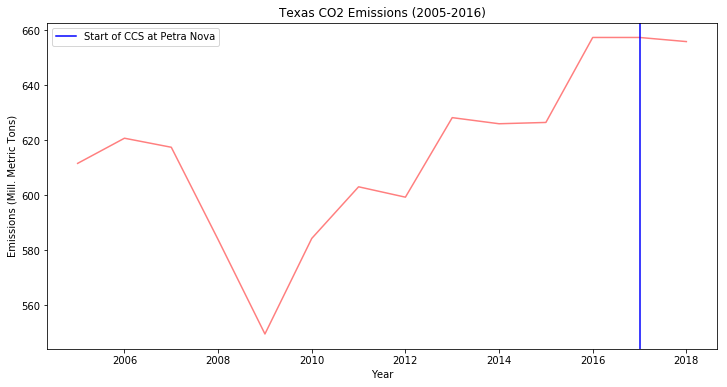

In [153]:
# Visualize emmisions by year and the future impact of Petra Nova CCS

plt.figure(figsize = (12, 6))
plt.plot(x, y, color = 'r', alpha=0.5)
plt.title("Texas CO2 Emissions (2005-2016)")
plt.xlabel("Year")
plt.ylabel("Emissions (Mill. Metric Tons)");

xcoords = [2017]
colors = ['b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Start of CCS at Petra Nova'.format(xc), c=c)

plt.legend()
plt.show()

In [155]:
# 2016 emissions - that collected by Petra Nova's CCS = predicted 2018

657.4204303592136 - (10*(1.5))

642.4204303592136

In [156]:
y2 = texas_preds = np.array([611.5749752453852,
 620.7367492194293,
 617.4442541406862,
 583.8230882039086,
 549.4598022493468,
 584.2515349128013,
 603.0476744317658,
 599.2715153271762,
 628.229958381975,
 626.004216984045,
 626.4776756989847,
 657.4204303592136, 657.4204303592136, 642.4204303592136])

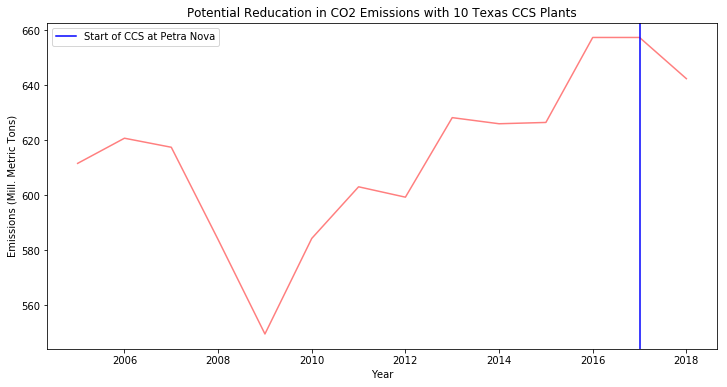

In [159]:
# Visualize emmisions by year and the future impact of 10 CCS like Petra Nova

plt.figure(figsize = (12, 6))
plt.plot(x, y2, color = 'r', alpha=0.5)
plt.title("Potential Reducation in CO2 Emissions with 10 Texas CCS Plants")
plt.xlabel("Year")
plt.ylabel("Emissions (Mill. Metric Tons)");

xcoords = [2017]
colors = ['b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Start of CCS at Petra Nova'.format(xc), c=c)

plt.legend()
plt.show()